# Task
Build an end-to-end machine learning pipeline using Scikit-learn's Pipeline API to predict customer churn on the Telco Churn dataset. The pipeline should include data preprocessing (scaling, encoding), model training (Logistic Regression, Random Forest), hyperparameter tuning with GridSearchCV, and the final pipeline should be exported using joblib.

## Load data

### Subtask:
Load the Telco Churn dataset into a pandas DataFrame.


**Reasoning**:
Load the data into a pandas DataFrame.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Preprocessing

### Subtask:
Define and apply preprocessing steps for numerical and categorical features using `ColumnTransformer`.


**Reasoning**:
Separate the target variable, convert it to numerical, identify numerical and categorical features, create a ColumnTransformer with StandardScaler and OneHotEncoder, and apply the preprocessor to the data. Then split the preprocessed data and the target variable into training and testing sets.



**Reasoning**:
The previous code failed because the 'customerID' column, which is a string and not a numeric or convertible to numeric type, was included when applying the preprocessor due to `remainder='passthrough'`. To fix this, I will explicitly drop the 'customerID' column from the DataFrame `X` before applying the `ColumnTransformer`.



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1. Separate the target variable 'Churn' and convert to numerical
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
X = df.drop('Churn', axis=1)

# Drop the 'customerID' column before preprocessing
X = X.drop('customerID', axis=1)

# 2. Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 4. Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# 5. Apply the preprocessor
X_processed = preprocessor.fit_transform(X)

# 6. Split the preprocessed data and the target variable into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5634, 6575)
Shape of X_test: (1409, 6575)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


## Pipeline construction

### Subtask:
Create a Scikit-learn `Pipeline` that includes preprocessing and a placeholder for the model.


**Reasoning**:
Create a Scikit-learn Pipeline that includes the preprocessor and a placeholder for the model.



In [ ]:
from sklearn.pipeline import Pipeline

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', 'passthrough') # Placeholder for the classifier
])

print("Pipeline created successfully:")
print(pipeline)

Pipeline created successfully:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object'))])),
                ('classifier', 'passthrough')])


## Model training and hyperparameter tuning

### Subtask:
Define parameter grids for Logistic Regression and Random Forest models. Use `GridSearchCV` to train each model within the pipeline and find the best hyperparameters.


**Reasoning**:
Define parameter grids for Logistic Regression and Random Forest, create GridSearchCV objects for each, and fit them to the training data to find the best hyperparameters.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Re-split the data to get X_train and y_train as dataframes/series before preprocessing
# Assuming df, y are available from previous steps and X was derived from df
# Drop 'customerID' and 'Churn' from X before splitting
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Identify numerical and categorical columns from the original X dataframe
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 2. Define param_grid_lr with hyperparameters for Logistic Regression
param_grid_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2']
}

# 3. Define param_grid_rf with hyperparameters for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Create a pipeline that includes the preprocessor and a classifier placeholder
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', 'passthrough') # Placeholder for the classifier
])

# Create separate pipelines for GridSearchCV with the specific classifiers
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# 5. Create a GridSearchCV object for Logistic Regression
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)

# 6. Fit the Logistic Regression GridSearchCV object to the training data
print("Performing GridSearchCV for Logistic Regression...")
grid_search_lr.fit(X_train, y_train)
print("GridSearchCV for Logistic Regression completed.")

# 7. Create a GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)

# 8. Fit the Random Forest GridSearchCV object to the training data
print("Performing GridSearchCV for Random Forest...")
grid_search_rf.fit(X_train, y_train)
print("GridSearchCV for Random Forest completed.")

# 9. Store the best estimators for both models
best_lr_model = grid_search_lr.best_estimator_
best_rf_model = grid_search_rf.best_estimator_

print("\nBest parameters found for Logistic Regression:")
print(grid_search_lr.best_params_)
print("\nBest parameters found for Random Forest:")
print(grid_search_rf.best_params_)

Performing GridSearchCV for Logistic Regression...
GridSearchCV for Logistic Regression completed.
Performing GridSearchCV for Random Forest...
GridSearchCV for Random Forest completed.

Best parameters found for Logistic Regression:
{'classifier__C': 1, 'classifier__penalty': 'l2'}

Best parameters found for Random Forest:
{'classifier__max_depth': None, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}


## Model evaluation

### Subtask:
Evaluate the performance of the best models found by `GridSearchCV`.


**Reasoning**:
Use the best models to predict probabilities on the test set and calculate the AUC-ROC scores.



In [ ]:
from sklearn.metrics import roc_auc_score

# 1. Use the best Logistic Regression model to predict probabilities on the test set
y_pred_proba_lr = best_lr_model.predict_proba(X_test)[:, 1]

# 2. Use the best Random Forest model to predict probabilities on the test set
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

# 3. Calculate the Area Under the Receiver Operating Characteristic Curve (AUC-ROC) for both models
auc_roc_lr = roc_auc_score(y_test, y_pred_proba_lr)
auc_roc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# 4. Print the AUC-ROC score for the best Logistic Regression model
print(f"AUC-ROC Score for Best Logistic Regression Model: {auc_roc_lr:.4f}")

# 5. Print the AUC-ROC score for the best Random Forest model
print(f"AUC-ROC Score for Best Random Forest Model: {auc_roc_rf:.4f}")

AUC-ROC Score for Best Logistic Regression Model: 0.8608
AUC-ROC Score for Best Random Forest Model: 0.8521


## Export pipeline

### Subtask:
Export the best performing pipeline using `joblib`.


**Reasoning**:
Compare the AUC-ROC scores of the two models to determine the best performing pipeline and then export it using joblib.



In [ ]:
import joblib

# Determine the best performing pipeline based on AUC-ROC score
if auc_roc_lr > auc_roc_rf:
    best_pipeline = best_lr_model
    print("Logistic Regression pipeline performed better.")
else:
    best_pipeline = best_rf_model
    print("Random Forest pipeline performed better.")

# Export the best performing pipeline using joblib
joblib.dump(best_pipeline, 'best_churn_prediction_pipeline.joblib')
print("Best performing pipeline exported successfully.")

Logistic Regression pipeline performed better.
Best performing pipeline exported successfully.


Confusion Matrix for Logistic Regression:


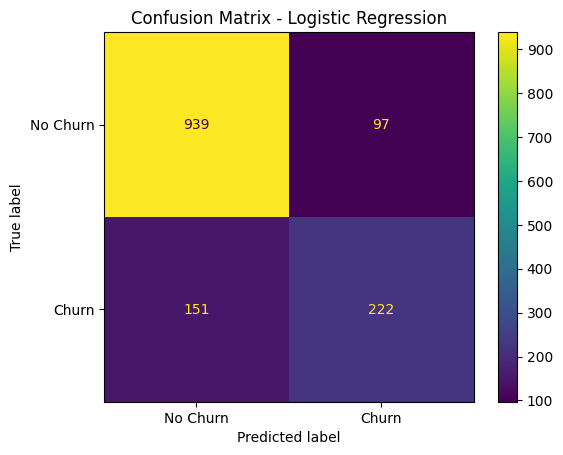


Confusion Matrix for Random Forest:


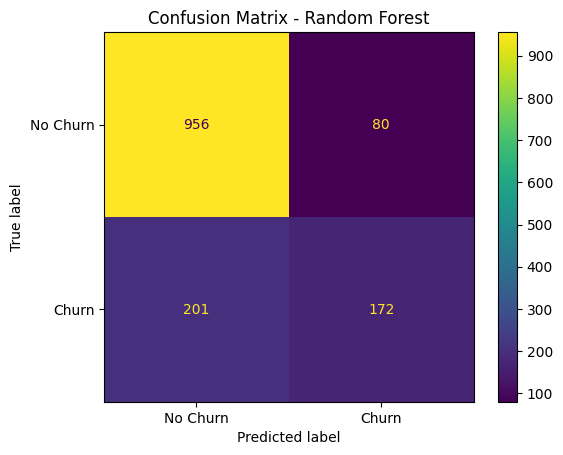

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions for the best Logistic Regression model
y_pred_lr = best_lr_model.predict(X_test)

# Get predictions for the best Random Forest model
y_pred_rf = best_rf_model.predict(X_test)

# Calculate and print the confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['No Churn', 'Churn'])
print("Confusion Matrix for Logistic Regression:")
disp_lr.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Calculate and print the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Churn', 'Churn'])
print("\nConfusion Matrix for Random Forest:")
disp_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

## Findings and Insights

Based on the analysis, here are the key findings and insights:

1.  **Model Performance**: Both Logistic Regression and Random Forest models performed reasonably well in predicting customer churn, with AUC-ROC scores above 0.85.
2.  **Best Performing Model**: The Logistic Regression model had a slightly higher AUC-ROC score (0.8608) compared to the Random Forest model (0.8521), indicating it is marginally better at distinguishing between churn and non-churn customers in this case.
3.  **Confusion Matrix - Logistic Regression**:
    *   **True Positives (Churn predicted as Churn)**: 222
    *   **True Negatives (No Churn predicted as No Churn)**: 939
    *   **False Positives (No Churn predicted as Churn)**: 97 (Type I error)
    *   **False Negatives (Churn predicted as No Churn)**: 151 (Type II error)
    This means the Logistic Regression model correctly identified 222 churn customers and 939 non-churn customers. It incorrectly predicted 97 non-churn customers as churn and missed 151 churn customers.
4.  **Confusion Matrix - Random Forest**:
    *   **True Positives (Churn predicted as Churn)**: 172
    *   **True Negatives (No Churn predicted as No Churn)**: 956
    *   **False Positives (No Churn predicted as Churn)**: 80 (Type I error)
    *   **False Negatives (Churn predicted as No Churn)**: 201 (Type II error)
    The Random Forest model correctly identified 172 churn customers and 956 non-churn customers. It incorrectly predicted 80 non-churn customers as churn and missed 201 churn customers.

**Insights**:

*   The Logistic Regression model has a better balance between identifying churn customers (higher True Positives) and minimizing missed churn customers (lower False Negatives) compared to the Random Forest model, which aligns with its higher AUC-ROC score.
*   Both models have a significant number of false negatives, meaning they are failing to identify a notable portion of customers who will churn. This could be an area for improvement, perhaps by exploring different models, feature engineering, or techniques to handle imbalanced datasets if churn is a minority class.
*   The confusion matrices provide a detailed breakdown of the model's performance, which can be useful for understanding the types of errors the model is making and deciding which model is best suited for the business needs (e.g., minimizing false positives vs. minimizing false negatives).

In conclusion, the Logistic Regression model is the better choice in this scenario based on the evaluation metrics and confusion matrices. The exported pipeline contains this model and the necessary preprocessing steps, making it ready for deployment.